## Load the meta data into a dataframe

In [1]:
import pandas as pd

df = pd.read_excel('../data/labelled_data.xlsx', sheet_name='AllAnimals')

df


/home/tom-ratsakatika/miniconda3/envs/camera-traps/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/tom-ratsakatika/miniconda3/envs/camera-traps/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


,Sort,Session,Category,GMU,TrapSite,Longitude,Latitude,Altitude,StartDate,EndDate,...,Date,Time,RawName,Species,NoAnimals,Sex,Image quality,Problem,Sequence,Comments
0,1,1,Systematic monitoring of lynx,29PiatraCraiuluiBV,Tamasului,25.172013,45.536521,1463,2018-02-15 00:00:00,2018-04-05 00:00:00,...,2018-01-01 00:00:00,na,I__00016,Bear,1,u,medium,partly,6,date unknown
1,2,1,Systematic monitoring of lynx,29PiatraCraiuluiBV,Tamasului,25.172013,45.536521,1463,2018-02-15 00:00:00,2018-04-05 00:00:00,...,2018-01-01 00:00:00,na,I__00026,European hare,1,u,bad,overexposed,2,date unknown
2,3,1,Systematic monitoring of lynx,29PiatraCraiuluiBV,Otetelea,25.184649,45.527437,1515,2018-02-15 00:00:00,2018-04-05 00:00:00,...,2018-01-01 00:00:00,na,I__00002 (2),Fox,1,u,medium,overexposed,1,pooing; date unknown
3,4,1,Systematic monitoring of lynx,29PiatraCraiuluiBV,Otetelea,25.184649,45.527437,1515,2018-02-15 00:00:00,2018-04-05 00:00:00,...,2018-01-01 00:00:00,na,I__00002,Fox,1,u,good,no problem,2,date unknown
4,5,1,Systematic monitoring of lynx,29PiatraCraiuluiBV,Otetelea,25.184649,45.527437,1515,2018-02-15 00:00:00,2018-04-05 00:00:00,...,2018-01-01 00:00:00,na,I__00006,Fox,1,u,bad,overexposed,1,date unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19022,19023,5,Systematic monitoring of feeding points,31BarsaBV,Valea Parului,25.22696,45.584392,880,2021-05-24 00:00:00,2021-06-15 00:00:00,...,2021-06-05 00:00:00,06:06:00,06050011,Squirrel,1,u,medium,no problem,1,na
19023,19024,5,Systematic monitoring of feeding points,31BarsaBV,Valea Parului,25.22696,45.584392,880,2021-05-24 00:00:00,2021-06-15 00:00:00,...,2021-06-07 00:00:00,23:20:00,06070013,Fox,1,u,medium,no problem,1,na
19024,19025,5,Systematic monitoring of feeding points,31BarsaBV,Valea Parului,25.22696,45.584392,880,2021-05-24 00:00:00,2021-06-15 00:00:00,...,2021-06-08 00:00:00,09:03:00,06080014,Roe deer,1,m,medium,no problem,1,na
19025,19026,5,Systematic monitoring of feeding points,31BarsaBV,Valea Parului,25.22696,45.584392,880,2021-06-16 00:00:00,2021-06-16 00:00:00,...,2021-06-16 00:00:00,07:15:00,06160001,Fox,1,u,medium,no problem,2,na


## Plot the locations of the camera traps on a map 

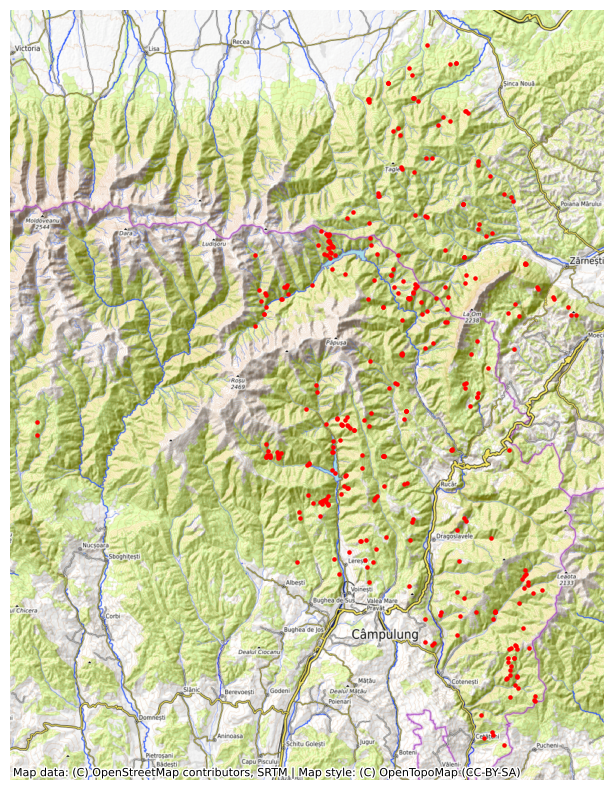

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

# Convert 'na' strings to NaN and drop rows with NaN in Longitude or Latitude
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df_clean = df.dropna(subset=['Longitude', 'Latitude'])

# Select unique locations based on Longitude and Latitude
unique_locations = df_clean[['Longitude', 'Latitude']].drop_duplicates()

# Create a GeoDataFrame, specifying the coordinate reference system (CRS) as WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(unique_locations, geometry=gpd.points_from_xy(unique_locations.Longitude, unique_locations.Latitude))
gdf.crs = "EPSG:4326"

# Convert the GeoDataFrame to Web Mercator projection (epsg:3857) for use with contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=5)
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)
ax.set_axis_off()
plt.show()


## Plot a bar char of the count for each species

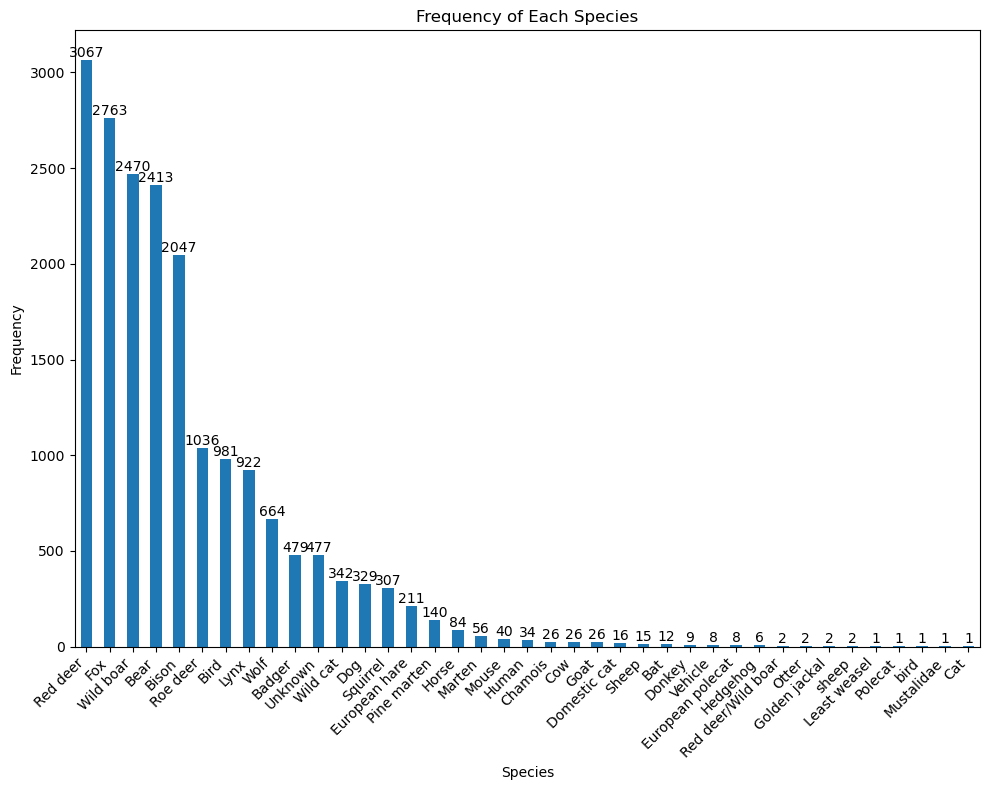

In [3]:
# Count the occurrences of each species
species_counts = df['Species'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
ax = species_counts.plot(kind='bar')
plt.title('Frequency of Each Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  # Rotate species names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Add count labels to the top of the bars
for i, v in enumerate(species_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


## Plot the frequency of detections of wild boar on a map

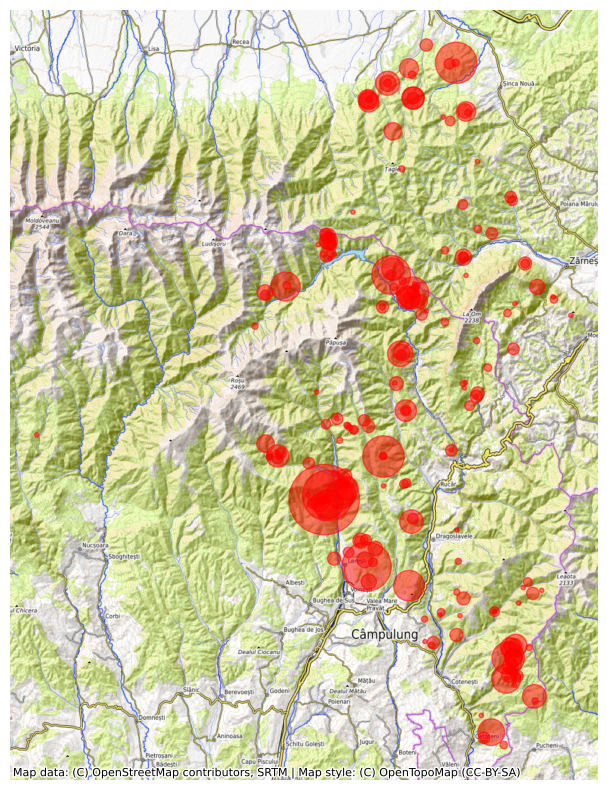

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Filter for "Wild boar" species
wild_boar_df = df[df['Species'] == 'Wild boar']

# Count detections at each unique location
location_counts = wild_boar_df.groupby(['Longitude', 'Latitude']).size().reset_index(name='Counts')

# Create a GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(location_counts, geometry=gpd.points_from_xy(location_counts.Longitude, location_counts.Latitude))

# Set the coordinate reference system (CRS) to WGS84
gdf.crs = 'EPSG:4326'

# Convert the GeoDataFrame to Web Mercator projection for use with contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Adjust marker size based on the count of detections. The 'Counts' value is scaled to ensure visibility on the map.
gdf.plot(ax=ax, markersize=gdf['Counts']*10, color='red', alpha=0.5)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

# Remove axis for a cleaner look
ax.set_axis_off()

plt.show()